In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [17]:
plt.rcParams.update({'axes.titlesize' : 22,
                     'axes.labelsize' : 20,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))
priv_palette=sns.color_palette(["#00A321", "#00CC29", "#00F531", "#1FFF4B"])
unpriv_palette=sns.color_palette(["#5C3993","#6E45B0","#835DC0","#9A7BCC"])
MR_palette=sns.color_palette(["#A31621","#C51B29","#E22837","#E74B58"])
SES_palette=sns.color_palette(["#E28413","#ED9831","#F0AB56","#F4BE7C"])

In [18]:
exp_name = 'exp17D'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import results 
stats_df1 = pd.read_csv(results_dir + 'naive.csv', index_col=0)
stats_df2 = pd.read_csv(results_dir + 'EqOppFPR.csv', index_col=0)
stats_df3 = pd.read_csv(results_dir + 'EqOppTPR.csv', index_col=0)
stats_df4 = pd.read_csv(results_dir + 'EqOdds.csv', index_col=0)

In [19]:
stats_df = pd.concat([stats_df1, stats_df2, stats_df3, stats_df4])
stats_df = stats_df.replace({'naive': 'Naive'}) #capitalize Naive for plotting purposes
stats_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,lost_to_followup_frac,lost_to_followup_ratio,delay_ratio,delay_frac,t2_ratio,t2_frac,average_age_in_pool,screening_loc,n_sim,ai_fairness
0,0,250000,250000,249291,249270,709,730,48,104,250000,...,0.114905,1.715847,3.519231,0.267045,0.595937,0.803409,57.514413,-10,877132087,Naive
1,1,249976,250024,249144,249088,832,936,104,211,246560,...,0.115495,1.786117,3.177419,0.247610,0.660714,0.800191,57.559951,-10,877132087,Naive
2,2,250021,249979,249128,249042,893,937,93,214,246667,...,0.116447,1.662700,2.662162,0.238347,0.590909,0.800352,57.607187,-10,877132087,Naive
3,3,250188,249812,249331,248853,857,959,109,205,246806,...,0.114934,1.773281,3.890909,0.244102,0.676190,0.798548,57.663288,-10,877132087,Naive
4,4,250237,249763,249370,248799,867,964,107,226,246909,...,0.118489,1.727122,3.456140,0.233671,0.615672,0.796688,57.720570,-10,877132087,Naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,46,253250,246750,252296,245613,954,1137,134,633,234682,...,0.065249,0.119376,0.135135,0.127273,0.054645,0.877273,58.064989,0,683688611,EqOdds
25496,47,253266,246734,252311,245562,955,1172,143,663,234840,...,0.065573,0.113718,0.114286,0.122449,0.049360,0.901099,58.131397,0,683688611,EqOdds
25497,48,253284,246716,252309,245491,975,1225,149,699,234541,...,0.063502,0.129196,0.083333,0.117647,0.062271,0.874811,58.183115,0,683688611,EqOdds
25498,49,253336,246664,252383,245470,953,1194,161,714,234946,...,0.066072,0.132808,0.171875,0.117005,0.057361,0.862715,58.226575,0,683688611,EqOdds


In [20]:
#compute derived metrics
#group mortality rates
stats_df['MR_priv'] = stats_df['n_died_priv']/stats_df['n_priv']*1e5
stats_df['MR_unpriv'] = stats_df['n_died_unpriv']/stats_df['n_unpriv']*1e5
stats_df['deltaMR'] = stats_df['MR_unpriv']-stats_df['MR_priv']
stats_df['MR_ratio'] = stats_df['MR_unpriv']/stats_df['MR_priv']

#percent change in group avg SEI
stats_df['change_SEI_avg_priv'] = stats_df['SEI_avg_priv'].pct_change()*100
stats_df['change_SEI_avg_unpriv'] = stats_df['SEI_avg_unpriv'].pct_change()*100

#percent change in group median SEI
stats_df['change_SEI_med_priv'] = stats_df['SEI_med_priv'].pct_change()*100
stats_df['change_SEI_med_unpriv'] = stats_df['SEI_med_unpriv'].pct_change()*100

#inter-group deltaSEI
stats_df['inter_dSEI'] = np.absolute(stats_df['SEI_avg_priv']-stats_df['SEI_avg_unpriv'])

#percent change in inter-group deltaSEI 
stats_df['change_inter_dSEI'] = stats_df['inter_dSEI'].pct_change()*100

#intra-group deltaSEI
stats_df['intra_dSEI_priv'] = stats_df['SEI_max_priv']-stats_df['SEI_min_priv']
stats_df['intra_dSEI_unpriv'] = -stats_df['SEI_max_unpriv']-stats_df['SEI_min_unpriv']

stats_df['screen_ratio'] = stats_df['n_screened_unpriv']/stats_df['n_screened_priv']
stats_df['percent_unpriv_screened'] = stats_df['n_screened_unpriv']/stats_df['n_unpriv']
stats_df['percent_priv_screened'] = stats_df['n_screened_priv']/stats_df['n_priv']
stats_df['RR'] = stats_df['percent_unpriv_screened']/stats_df['percent_priv_screened'] #relative risk 
stats_df['risk_difference'] = stats_df['percent_priv_screened']-stats_df['percent_unpriv_screened']
stats_df['1-risk_difference'] = 1-stats_df['risk_difference']

In [21]:
loc_vals = stats_df.screening_loc.value_counts().index.values
print(loc_vals)

[-10  -7  -5  -3   0]


In [22]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for loc in loc_vals: 
        avg = stats_df[(stats_df['screening_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['percent_unpriv_screened'].mean()
        stats_df.loc[(stats_df['screening_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'percent_unpriv_screened_avg'] = avg.round(2)

        avg = stats_df[(stats_df['screening_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['percent_priv_screened'].mean()
        stats_df.loc[(stats_df['screening_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'percent_priv_screened_avg'] = avg.round(2)

        avg = stats_df[(stats_df['screening_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['screen_ratio'].mean()
        stats_df.loc[(stats_df['screening_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'screen_ratio_avg'] = avg.round(2)

In [23]:
stats_df.percent_unpriv_screened_avg.value_counts()

percent_unpriv_screened_avg
0.73    20400
0.49    20400
0.05    20400
0.25    20400
0.93    15300
0.92     5100
Name: count, dtype: int64

In [24]:
stats_df.percent_priv_screened_avg.value_counts()

percent_priv_screened_avg
0.99    51000
0.98    30600
0.93    20400
Name: count, dtype: int64

<Axes: xlabel='percent_unpriv_screened', ylabel='Count'>

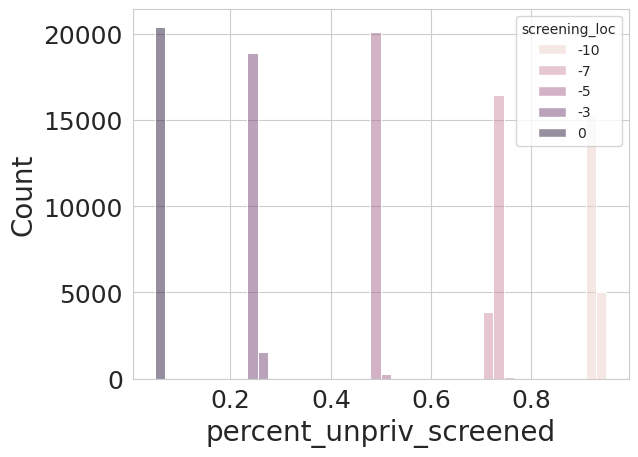

In [26]:
sns.histplot(stats_df, x='percent_unpriv_screened', hue='screening_loc')

In [28]:
stats_df['percent_screened_avg'] = stats_df.apply(lambda row: str(row['percent_unpriv_screened_avg']) + '\n' + str(row['percent_priv_screened_avg']), axis=1)

In [ ]:
# def plt_MR(df, save=False): 
#     #remove yr 1 from data
#     df = df[df.year != 0]
    
#     plt.figure(figsize=(10,6))
#     sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='percent_screened_avg', y='MR_priv', hue='ai_fairness', linestyles=["-", "--"], palette=priv_palette)
#     sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='percent_screened_avg', y='MR_unpriv', hue='ai_fairness', linestyles=["-", "--"], palette=unpriv_palette) 
#     # sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='percent_unpriv_screened_avg', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
#     # sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='percent_unpriv_screened_avg', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)
#     plt.title('50-yr Average Mortality Rate')
#     plt.ylim([20,300])
#     plt.xlabel('Proportion of Unprivileged Group Screened')
#     plt.ylabel('50-yr Average Mortality Rate\n(per 100k)')
#     plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#     plt.tight_layout()
#     if save:
#         plt.savefig(results_dir + 'MR.png', dpi=800)
#         plt.savefig(results_dir + 'MR.svg')
#     plt.show()

In [47]:
def plt_MR(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='MR_priv', hue='ai_fairness', linestyles=["-", "--"], palette=priv_palette)
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='MR_unpriv', hue='ai_fairness', linestyles=["-", "--"], palette=unpriv_palette) 
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)
    plt.title('50-yr Average Mortality Rate')
    plt.ylim([20,300])
    plt.xlabel(r'Screening Parameter, $b_{s}$')
    plt.ylabel('50-yr Average Mortality Rate\n(per 100k)')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'MR.png', dpi=800)
        plt.savefig(results_dir + 'MR.svg')
    plt.show()

/tmp/ipykernel_4281/181311680.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
/tmp/ipykernel_4281/181311680.py:9: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)


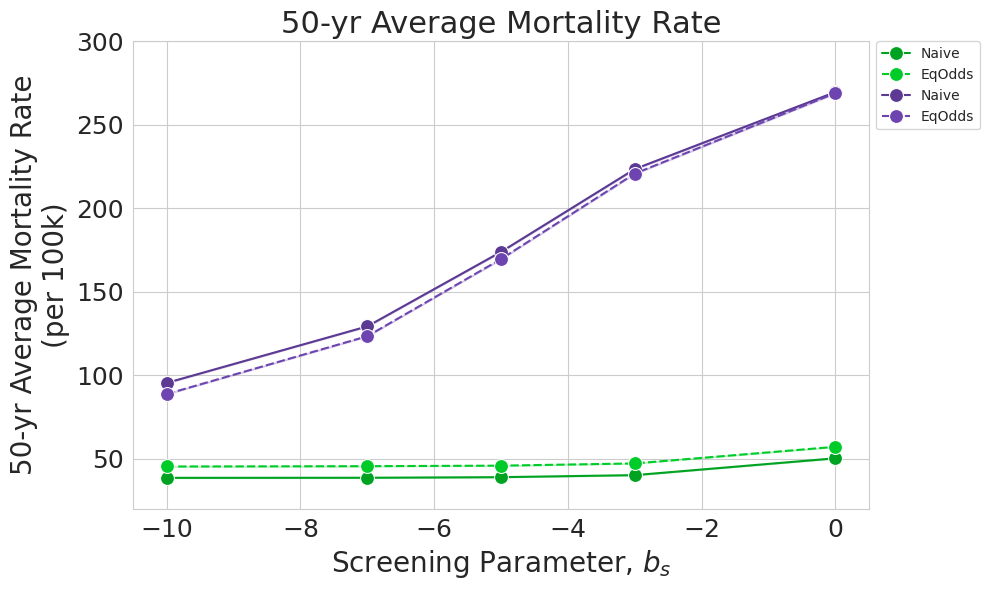

In [48]:
plt_MR(stats_df, True)

In [51]:
def plt_interdSEI(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='inter_dSEI', hue='ai_fairness', linestyles=["-", "--"], palette=SES_palette)   
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=SES_palette)
    plt.title(f'50-yr Average SEI Disparity')
    plt.xlabel(r'Screening Parameter, $b_{s}$')
    plt.ylabel('50-yr Average SEI Disparity')
    plt.ylim([1.970, 2.015])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'dSEI.png', dpi=800)
        plt.savefig(results_dir + 'dSEI.svg')
    plt.show()

/tmp/ipykernel_4281/3291788575.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='screening_loc', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=SES_palette)


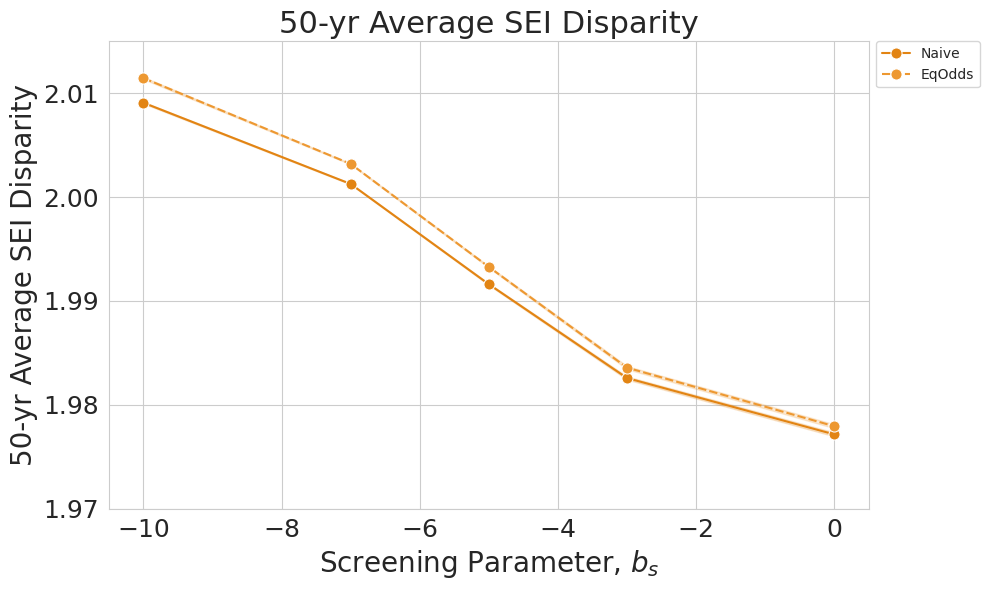

In [52]:
plt_interdSEI(stats_df, True)

In [53]:
def compute_avg_metrics(df, metric_col, ai_fairness, loc):

    #remove yr 1 from data
    df = df[df.year != 0]
    
    #get dataframe for specific fairness scenario
    df = df.loc[(df['ai_fairness'] == ai_fairness) & (df['screening_loc'] == loc)]
    # print(len(df))

    stats = df.groupby(['n_sim'])[metric_col].agg(['mean', 'count', 'std'])
    # print(stats)
    print('-'*75)
    
    #get 95% confidence interval of average metric over all simulations
    m = stats['mean'].mean()
    s = stats['mean'].std()
    c = stats['mean'].count()

    ci95_hi = m + 1.96*s/math.sqrt(c)
    ci95_low = m - 1.96*s/math.sqrt(c)

    print(f'average (95%CI) {metric_col} for {ai_fairness} and loc = {loc} over {c} simulations: {m:.2f} ({ci95_low:.2f}, {ci95_hi:.2f})')
    print('-'*75)

In [38]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -10 over 100 simulations: 38.50 (38.39, 38.60)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -7 over 100 simulations: 38.55 (38.43, 38.67)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -5 over 100 simulations: 38.91 (38.80, 39.02)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -3 over 100 simulations: 40.12 (40.01, 40.24)
---------------------------------------------------------------------------
-------------------------------

In [40]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['SEI_avg_priv', 'SEI_avg_unpriv']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -10 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -7 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -5 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -3 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
-----------------------

In [54]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['percent_priv_screened_avg', 'percent_unpriv_screened_avg']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) percent_priv_screened_avg for Naive and loc = -10 over 100 simulations: 0.99 (0.99, 0.99)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_screened_avg for Naive and loc = -7 over 100 simulations: 0.99 (0.99, 0.99)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_screened_avg for Naive and loc = -5 over 100 simulations: 0.98 (0.98, 0.98)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_screened_avg for Naive and loc = -3 over 100 simulations: 0.98 (0.98, 0.98)
-----------------------------------------------